Weather image classification

Team members:


```
Mayukha Thumiki (UTA ID: 1002055616)
```


```
Venkata Sai Likhita Kurapati (UTA ID: 1002066295)
```





References:


```
https://www.kaggle.com/code/utkarshsaxenadn/weather-classification-resnet-acc-91
```
```
https://medium.com/swlh/classification-of-weather-images-using-resnet-34-in-pytorch-7e86b2b24dcf
```
```
https://github.com/chiragdaryani/Weather-Images-Classification-in-PyTorch/blob/main/Weather_Images_Classification_Project_Final_Submission.ipynb
```





In [ ]:
!pip install opendatasets
!pip install pandas

In [ ]:
import opendatasets as od
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers, Sequential, models
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization, Dense, Flatten, Activation, Add
from tensorflow.keras.initializers import he_uniform
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
from tensorflow.keras.layers import Conv2D, LeakyReLU, MaxPooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Activation
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import cv2
from tensorflow.keras.applications.resnet_v2 import preprocess_input

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
od.download("https://www.kaggle.com/datasets/jehanbhathena/weather-dataset?resource=download")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: thumikimayukha
Your Kaggle Key: ··········


100%|██████████| 587M/587M [00:17<00:00, 34.2MB/s]


In [ ]:
BATCH_SIZE=32
IMAGE_SIZE = 224

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/weather-dataset/dataset",
    seed=12,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)


Found 6862 files belonging to 11 classes.


In [ ]:
first_class_names = dataset.class_names
class_names=first_class_names
class_names

['dew',
 'fogsmog',
 'frost',
 'glaze',
 'hail',
 'lightning',
 'rain',
 'rainbow',
 'rime',
 'sandstorm',
 'snow']

In [ ]:

root_path = '/content/weather-dataset/dataset'

class_names = sorted(os.listdir(root_path))
n_classes = len(class_names)

print(f"Total No. of Classes : {n_classes}")

Total No. of Classes : 11


In [ ]:
train_gen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.5,
    height_shift_range=0.5,
    brightness_range=[0.25, 1.5],
    validation_split=0.2
)
# Load Data
target_size = (256, 256)
batch_size = 32
class_mode = "binary"
shuffle = True


train_ds = train_gen.flow_from_directory(
    root_path,
    target_size=target_size,
    class_mode=class_mode,
    subset='training',
    shuffle=shuffle,
    batch_size=batch_size
)

valid_ds = train_gen.flow_from_directory(
    root_path,
    target_size=target_size,
    class_mode=class_mode,
    subset='validation',
    shuffle=shuffle,
    batch_size=batch_size
)

Found 5493 images belonging to 11 classes.
Found 1369 images belonging to 11 classes.


In [ ]:

base_model = ResNet152V2(include_top=False, input_shape=(256, 256, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    Conv2D(128, (3, 3), padding='same'),
    LeakyReLU(alpha=0.1),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), padding='same'),
    LeakyReLU(alpha=0.1),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), padding='same'),
    LeakyReLU(alpha=0.1),
    MaxPooling2D((2, 2)),
    GlobalAveragePooling2D(),
    Dense(512),
    Activation('relu'),
    Dropout(0.4),
    Dense(256),
    Activation('tanh'),
    Dropout(0.3),
    Dense(128),
    Activation('tanh'),
    Dropout(0.2),
    Dense(64),
    Activation('relu'),
    Dropout(0.2),
    Dense(n_classes, activation='softmax')
])

234545216/234545216 [==============================] - 7s 0us/step


In [ ]:
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
checkpoint_path = "weather_classifier.h5"
model_checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=False,
    verbose=1
)
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

cbs = [model_checkpoint, early_stopping]

In [ ]:
model.fit(train_ds, epochs=12, callbacks=cbs, validation_data=valid_ds)

Epoch 1/12
172/172 [==============================] - ETA: 0s - loss: 2.1415 - accuracy: 0.2152
Epoch 1: val_accuracy improved from -inf to 0.28488, saving model to weather_classifier.h5
172/172 [==============================] - 153s 770ms/step - loss: 2.1415 - accuracy: 0.2152 - val_loss: 1.8099 - val_accuracy: 0.2849
Epoch 2/12
172/172 [==============================] - ETA: 0s - loss: 1.6940 - accuracy: 0.3701
Epoch 2: val_accuracy improved from 0.28488 to 0.48430, saving model to weather_classifier.h5
172/172 [==============================] - 132s 767ms/step - loss: 1.6940 - accuracy: 0.3701 - val_loss: 1.3945 - val_accuracy: 0.4843
Epoch 3/12
172/172 [==============================] - ETA: 0s - loss: 1.4265 - accuracy: 0.4868
Epoch 3: val_accuracy improved from 0.48430 to 0.53981, saving model to weather_classifier.h5
172/172 [==============================] - 133s 775ms/step - loss: 1.4265 - accuracy: 0.4868 - val_loss: 1.2559 - val_accuracy: 0.5398
Epoch 4/12
172/172 [========

Testing with new data

In [ ]:
od.download("https://www.kaggle.com/datasets/vijaygiitk/multiclass-weather-dataset")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: thumikimayukha
Your Kaggle Key: ··········


100%|██████████| 134M/134M [00:04<00:00, 33.0MB/s]


In [ ]:
class_names_list = list(first_class_names)
class_names_list

['dew',
 'fogsmog',
 'frost',
 'glaze',
 'hail',
 'lightning',
 'rain',
 'rainbow',
 'rime',
 'sandstorm',
 'snow']

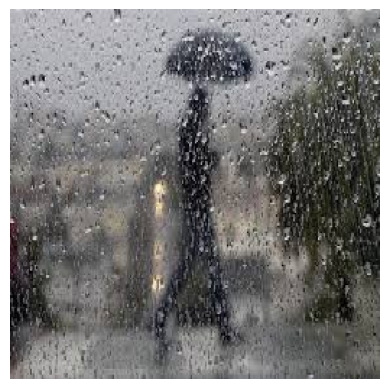

1/1 [==============================] - 0s 34ms/step


'rain'

In [ ]:
from tensorflow.keras.applications.resnet_v2 import preprocess_input
image_path = '/content/multiclass-weather-dataset/dataset/rainy/rain111.jpg'

img = load_img(image_path, target_size=(256, 256))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)
plt.imshow(img)
plt.axis('off')
plt.show()

prediction = model.predict(img_array)
predicted_class_index = np.argmax(prediction)

predicted_class_index = np.argmax(prediction)
predicted_class_index

predicted_class_label = class_names_list[predicted_class_index]
predicted_class_label

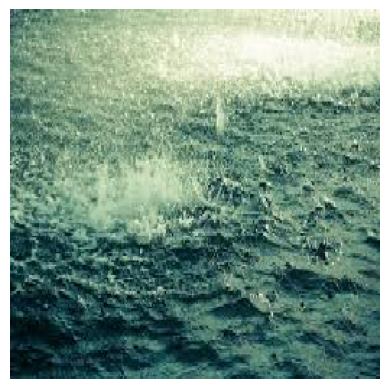

1/1 [==============================] - 0s 34ms/step


'rain'

In [ ]:

image_path = '/content/multiclass-weather-dataset/dataset/rainy/rain103.jpg'

img = load_img(image_path, target_size=(256, 256))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)
plt.imshow(img)
plt.axis('off')
plt.show()

prediction = model.predict(img_array)
predicted_class_index = np.argmax(prediction)

predicted_class_index = np.argmax(prediction)
predicted_class_index

predicted_class_label = class_names_list[predicted_class_index]
predicted_class_label

In [ ]:

def load_and_preprocess_images(directory_path):
    image_list = []
    for filename in os.listdir(directory_path):
        if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".jpeg"):
            image_path = os.path.join(directory_path, filename)
            img = cv2.imread(image_path)
            if img is not None:
                img = cv2.resize(img, (256, 256))
                img = img.astype("float32") / 255.0
                image_list.append(img)
    return np.array(image_list)

rainy_dir = "/content/multiclass-weather-dataset/dataset/rainy"
test_images = load_and_preprocess_images(rainy_dir)

predictions = model.predict(test_images)

predicted_labels = np.argmax(predictions, axis=1)

print("Predicted class labels for rainy images:")
print(predicted_labels)



10/10 [==============================] - 1s 91ms/step
Predicted class labels for rainy images:
[ 6  6  6  6  6  6  6  6  6  6  8  6  6  6 10  4  4  6  6  6  6  8  6  6
  6  6  6  6  6  4 10  6  6  6  4  6  8  1  6  6  6  6  6  6  1  6  6  6
  6  6  6  6  4  6  6  6  6  6  6  6  6  6  6  6  6  9  3  6  6  8  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6 10
  6  6  6  6  4  6  6  4  6  6  4  6  6  6  4  6  6  1  6  6  6  6  6  6
  6  6 10  6  6  6  4  6  5  6  6  6  6  6  6 10  6  4  6  6  6  6  4  6
  6  6  6  6  4  6  6  6  6  6  4  6  6  6  6  6  6  6  6  6  6 10  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6 10  6  6  6  6  6  6  6  6  9 10  6  6  6  6  6  4  6  6  6  8  3  6
  6  6  8  6  6  6  6  6 10  6  1  6 10  5  6  1  6  6  6 10  6 10  6  6
  6  4  6  6  6  3  6  8  4  4  6  6  6  6 10  4  6 10  8  6  6  6 10  3
  6  4  6  6  6  8  1  4  6  6  6  6  6  8  1 10  6  6  3 10  1  6  6  6
  6  6  6  6  4  6  6  6  6  

In [ ]:
num_occurrences_of_6 = np.count_nonzero(predicted_labels == 6)
print(f"Number of occurrences of label 6: {num_occurrences_of_6}")

Number of occurrences of label 6: 233


In [ ]:
class_rain_percentage = np.mean(predicted_labels == 6) * 100
class_rain_percentage

77.92642140468227

In [ ]:
len(predicted_labels)

299

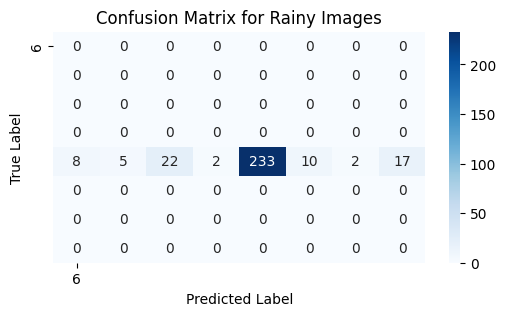

In [ ]:
true_labels = np.full((299,), 6)
cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(6, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[6], yticklabels=[6])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Rainy Images')
plt.show()

In [ ]:

def load_and_preprocess_images(directory_path):
    image_list = []
    for filename in os.listdir(directory_path):
        if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".jpeg"):
            image_path = os.path.join(directory_path, filename)
            img = cv2.imread(image_path)
            if img is not None:
                img = cv2.resize(img, (256, 256))  # Resize image to match the model input shape
                img = img.astype("float32") / 255.0  # Normalize pixel values to [0, 1]
                image_list.append(img)
    return np.array(image_list)

foggy_dir = "/content/multiclass-weather-dataset/dataset/foggy"
foggy_test_images = load_and_preprocess_images(foggy_dir)

predictions_foggy = model.predict(foggy_test_images)

predicted_labels_foggy = np.argmax(predictions_foggy, axis=1)

print("Predicted class labels for foggy images:")
print(predicted_labels_foggy)

10/10 [==============================] - 1s 91ms/step
Predicted class labels for foggy images:
[ 8  9  9  1  8 10  9  1  1 10  1  1  1  1  1 10  9  1  6  1  8  1 10  1
  6  1  6  1  1  1  1  6  9  6  1  1  9 10  6  1  1  6  9  6  1  1  6  8
  8 10  1  1  9  1  1  9  1  1  6  9  1  9  1  1  1  5  1  6  1  9  8  8
  9  5  1  6  1  1  1  1  1  1  6  6  1  9  1  6  1  1  9  9  1  1  1 10
  9  1  6  9  1  1  1 10  1  1 10  9  8 10  1 10  9  6  1  1  1  1 10  9
  1  1  9  9  1  1  1  1  9 10  1  1  1  8  8  8  1  9  9 10  1  1  1  1
 10  1  6  1 10  1  9  9 10  9  1  1  6 10  9  9  1  1  1  9  1  1  1  1
  1 10  1 10  6  1  1  1  9  1  1  1  1  1  9  1  1  9  1  1  6  9 10  1
 10  1  1  1  8  1 10  1  1  6  8  1  1  5  1  1 10  1  1  9  8 10  1  9
  1  1  6  6  9  1  1  1  1  1  1  1  1  6  1  8  1  6  1  1  9  1  6  1
  1  6 10  6  9  1 10  1  1  9  6  1  8 10  1  1  6  1  9  1  8  1  1  1
  9  9  1  1  1  6  1 10  1  8  1  9  6  1  1  1  1  1  9  1  6  1  1  9
  1  1  9  1  6  1  1  9  1  

In [ ]:
class_foggy_percentage = np.mean(predicted_labels_foggy == 1) * 100
class_foggy_percentage

54.333333333333336

In [ ]:
predicted_labels = [8, 9, 9, 1, 8, 10, 9, 1, 1, 10, 1, 1, 1, 1, 1, 10, 9, 1, 6, 1, 8, 1, 10, 1, 6, 1, 6, 1, 1, 1, 1, 6, 9, 6, 1, 1, 9, 10, 6, 1, 1, 6, 9, 6, 1, 1, 6, 8, 8, 10, 1, 1, 9, 1, 1, 9, 1, 1, 6, 9, 1, 9, 1, 1, 1, 5, 1, 6, 1, 9, 8, 8, 9, 5, 1, 6, 1, 1, 1, 1, 1, 1, 6, 6, 1, 9, 1, 6, 1, 1, 9, 9, 1, 1, 1, 10, 9, 1, 6, 9, 1, 1, 1, 10, 1, 1, 10, 9, 8, 10, 1, 10, 9, 6, 1, 1, 1, 1, 10, 9, 1, 1, 9, 9, 1, 1, 1, 1, 9, 10, 1, 1, 1, 8, 8, 8, 1, 9, 9, 10, 1, 1, 1, 1, 10, 1, 6, 1, 10, 1, 9, 9, 10, 9, 1, 1, 6, 10, 9, 9, 1, 1, 1, 9, 1, 1, 1, 1, 1, 10, 1, 10, 6, 1, 1, 1, 9, 1, 1, 1, 1, 1, 9, 1, 1, 9, 1, 1, 6, 9, 10, 1, 10, 1, 1, 1, 8, 1, 10, 1, 1, 6, 8, 1, 1, 5, 1, 1, 10, 1, 1, 9, 8, 10, 1, 9, 1, 1, 6, 6, 9, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 8, 1, 6, 1, 1, 9, 1, 6, 1, 1, 6, 10, 6, 9, 1, 10, 1, 1, 9, 6, 1, 8, 10, 1, 1, 6, 1, 9, 1, 8, 1, 1, 1, 9, 9, 1, 1, 1, 6, 1, 10, 1, 8, 1, 9, 6, 1, 1, 1, 1, 1, 9, 1, 6, 1, 1, 9, 1, 1, 9, 1, 6, 1, 1, 9, 1, 9, 1, 9]

count_of_ones = predicted_labels.count(1)
print("Count of class 1 (foggy):", count_of_ones)


Count of class 1 (foggy): 163


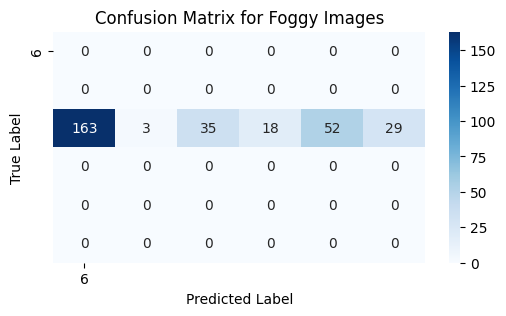

In [ ]:
true_labels = np.full((len(predicted_labels_foggy),), 6)

cm = confusion_matrix(true_labels, predicted_labels_foggy)

plt.figure(figsize=(6, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[6], yticklabels=[6])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Foggy Images')
plt.show()

In [ ]:
def load_and_preprocess_images(directory_path):
    image_list = []
    for filename in os.listdir(directory_path):
        if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".jpeg"):
            image_path = os.path.join(directory_path, filename)
            img = cv2.imread(image_path)
            if img is not None:
                img = cv2.resize(img, (256, 256))
                img = img.astype("float32") / 255.0
                image_list.append(img)
    return np.array(image_list)

sunny_dir = "/content/multiclass-weather-dataset/dataset/sunrise"
sunny_test_images = load_and_preprocess_images(sunny_dir)

predictions_sunny = model.predict(sunny_test_images)

predicted_labels_sunny = np.argmax(predictions_sunny, axis=1)

print("Predicted class labels for sunny images:")
print(predicted_labels_sunny)

11/11 [==============================] - 2s 154ms/step
Predicted class labels for sunny images:
[ 5  5  5  6  6  5  6  6  5  5  5  5  5  6  5  5  1  1  6  6  5  6  5  6
 10  5  6  1  5  5  5 10  1  5  9  6  6  5  5  6  6  5  5  5  1  8  1  6
  6  6  5  5 10  9  5  5  5  8  6  1  6  1  5  6  5  6  5  5  6  6  9  8
  5  5  6  5  5 10  5  6  5  5  5  5  6  5  5  1  5  1  5  5  6  5  6  5
  6  5  5  5  5  6  6  6  6  6  1 10  6  5  1  6  6  6  5  5  8  5  6  6
  5  5  6  6  6  5  5  6  6  6  5  5  6  1  5  5  8  6  5  6  5  5  5  6
  6  6  8  5  5  9  5  6  5  5  5  9  5  5  9  6  5  5  5  5  1  1  5  6
  5  5 10  5  6  5  5  6  6  3  6  5  5  5  9  1  5  1  5  5  5  5  9  5
  9  1  5  6  5  5  6  6  6  6  6  5  1  6  5  5  5  6  5  5  1  6  5  4
  9  5  5  6  5  9  6  6  6  5  5  5  6  5  6  1  5  6  5  5  1  9  6  5
  5  6  5  5  5  5  5  5  1  5  3  6  6  5  5  5  6  6  5  5  5  6  5  9
  6  5  9  6  6  6  6  1  5  6  5  5  5  5  1  6  1  5  9  5  5  6  5  6
  6  5  6  9  6  6  5  5  6 

In [ ]:
class_names_list[predicted_labels_sunny[1]]

'lightning'